[Pipeline] .. (step 1 of 22) Processing understand_data, total=   0.0s
[Pipeline] ......... (step 2 of 22) Processing plot_bar, total=   0.0s
[Pipeline] .. (step 3 of 22) Processing plot_facet_grid, total=   0.0s
[Pipeline] ........ (step 4 of 22) Processing plot_dist, total=   0.0s
[Pipeline] ......... (step 5 of 22) Processing log_fare, total=   0.0s
[Pipeline] ...... (step 6 of 22) Processing fill[Cabin], total=   0.0s
[Pipeline] . (step 7 of 22) Processing understand_data3, total=   0.0s
[Pipeline]  (step 8 of 22) Processing generate_col_title, total=   0.0s
[Pipeline]  (step 9 of 22) Processing rename_name2title, total=   0.0s
[Pipeline] ......... (step 10 of 22) Processing replace, total=   0.0s
[Pipeline] . (step 11 of 22) Processing plot_bar[title], total=   0.0s
[Pipeline]  (step 12 of 22) Processing generate[FamilyNum], total=   0.1s
[Pipeline]  (step 13 of 22) Processing plot_bar[FamilyNum], total=   0.0s
[Pipeline] ....... (step 14 of 22) Processing FamilyNum, total=   0.0s

G:\Program Files\Scoop\apps\anaconda3\2021.05\envs\ml-example\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[Pipeline]  (step 20 of 22) Processing onehot_encoder_cat, total=   2.5s
[Pipeline]  (step 21 of 22) Processing onehot_encoder_num, total=   0.0s
[Pipeline]  (step 22 of 22) Processing understand_data4, total=   0.0s
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


G:\Program Files\Scoop\apps\anaconda3\2021.05\envs\ml-example\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Fare_log     1308 non-null   float64
 11  Cabin        1309 non-null   object 
 12  Embarked     1309 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 183.2+ KB
None
   PassengerId  Survived   Age     Fare  Fare_log  FamilyNum  Title_Miss  \
0            1       0.0  22.0   7.2500  1.981001          1           0   
1            2       1.0  38.0  71.2833  4.

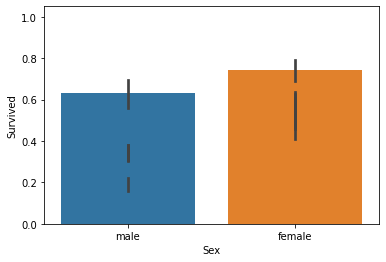

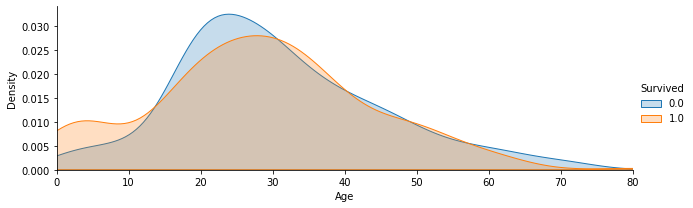

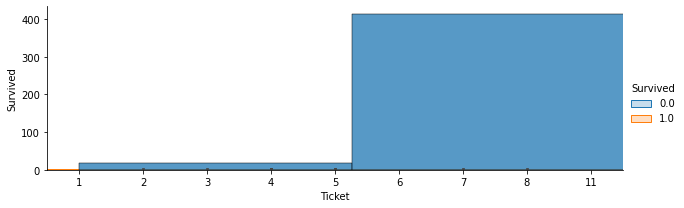

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdpipe as pdp
# import kaggle
import seaborn as sns
from pdpipe import ApplyByCols, ColRename, MapColVals, ApplyToRows, OneHotEncode

# plt.switch_backend('TkAgg')

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import KNNImputer

# !kaggle competitions download -c titanic
df_train = pd.read_csv(r'E:\GITHUB\iml\src\dataset\titanic\train.csv')
df_test = pd.read_csv(r'E:\GITHUB\iml\src\dataset\titanic\test.csv')

columns = df_test.columns

X = df_train.copy()
y = df_train['Survived']

X = pd.concat([df_train, df_test])


class UnderstandData():

    def fit(self, X, y=None, exraise=None, verbose=False):
        return X

    def transform(self, X, y=None, exraise=None, verbose=False):
        print(X.info())
        return X

    def fit_transform(self, X, y=None, exraise=None, verbose=False):
        return X


class DescribeData():

    def fit(self, X, y=None, exraise=None, verbose=False):
        return X

    def transform(self, X, y=None, exraise=None, verbose=False):
        print(X.describe())
        return X

    def fit_transform(self, X, y=None, exraise=None, verbose=False):
        return X


class Map2ValueCount():

    def __init__(self, columns=[]):
        self.columns = columns

    def fit(self, X, y=None, exraise=None, verbose=False):
        return X

    def transform(self, X, y=None, exraise=None, verbose=False):
        for col in self.columns:
            value_count_dict = X[col].value_counts()
            X[col] = X[col].map(value_count_dict)
        return X

    def fit_transform(self, X, y=None, exraise=None, verbose=False):
        return X


class HeadData():

    def fit(self, X, y=None, exraise=None, verbose=False):
        return X

    def transform(self, X, y=None, exraise=None, verbose=False):
        print(X.head())
        return X

    def fit_transform(self, X, y=None, exraise=None, verbose=False):
        return X


class PlotPair():

    def fit(self, X, y=None, exraise=None, verbose=False):
        return X

    def transform(self, X, y=None, exraise=None, verbose=False):
        sns.pairplot(X)
        plt.show()
        return X

    def fit_transform(self, X, y=None, exraise=None, verbose=False):
        return X


class MakeMIScore():
    def fit(self, X, y=None, exraise=None, verbose=False):
        return X

    def transform(self, X, y=None, exraise=None, verbose=False):
        X = X.copy()
        for colname in X.select_dtypes(["object", "category"]):
            X[colname], _ = X[colname].factorize()
        # All discrete features should now have integer dtypes
        discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
        mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
        mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
        mi_scores = mi_scores.sort_values(ascending=False)
        print(mi_scores)
        return X

    def fit_transform(self, X, y=None, exraise=None, verbose=False):
        return X


class PlotBar():
    """
    :param columns:
    :param y:
    """

    def __init__(self, columns, y):
        self.columns = columns
        self.y = y

    def fit(self, X, y=None, exraise=None, verbose=False):
        return X

    def transform(self, X, y=None, exraise=None, verbose=False):
        for col in self.columns:
            sns.barplot(data=X, x=col, y=self.y)
            plt.savefig(col)
            # plt.show()
        return X

    def fit_transform(self, X, y=None, exraise=None, verbose=False):
        return X


class PlotFacetGrid():
    """
    :param columns:
    :param y:
    """

    def __init__(self, columns, hue):
        self.columns = columns
        self.hue = hue

    def fit(self, X, y=None, exraise=None, verbose=False):
        return X

    def transform(self, X, y=None, exraise=None, verbose=False):
        for col in self.columns:
            # 创建坐标轴
            ageFacet = sns.FacetGrid(X, hue=self.hue, aspect=3)
            # 作图，选择图形类型
            ageFacet.map(sns.kdeplot, col, shade=True)
            # 其他信息：坐标轴范围、标签等
            ageFacet.set(xlim=(0, X[col].max()))
            ageFacet.add_legend()
            plt.savefig('PlotFacetGrid' + col)
            # plt.show()
        return X

    def fit_transform(self, X, y=None, exraise=None, verbose=False):
        return X


class PlotDistPlot():
    """
    :param columns:
    :param y:
    """

    def __init__(self, columns):
        self.columns = columns if type(columns) == list else [columns]

    def fit(self, X, y=None, exraise=None, verbose=False):
        return X

    def transform(self, X, y=None, exraise=None, verbose=False):
        for col in self.columns:
            sns.histplot(X[col][X[col].notna()], label='skewness: {:.2f}'.format(X[col].skew()))
            plt.savefig('PlotDistPlot' + col)
            # plt.show()
        return X

    def fit_transform(self, X, y=None, exraise=None, verbose=False):
        return X


class WrapperDF():

    def fit(self, X, y=None, exraise=None, verbose=False):
        return X

    def transform(self, X, y=None, exraise=None, verbose=False):
        X = pd.DataFrame(X) if type(X) is np.ndarray else X
        print(X.head())
        return X

    def fit_transform(self, X, y=None, exraise=None, verbose=False):
        return X


class FillNa():
    def __init__(self, condition={}, column=None, value=None):
        self.condition = condition
        self.column = column
        self.value = value
        self.imputer = KNNImputer(n_neighbors=10)

    def fit(self, X, y=None, exraise=None, verbose=False):
        X[self.column] = self.imputer.fit(X[self.column])
        return X

    def transform(self, X, y=None, exraise=None, verbose=False):
        X[self.column] = self.imputer.transform(X[self.column])
        return X

    def fit_transform(self, X, y=None, exraise=None, verbose=False):
        X[self.column] = self.imputer.fit_transform(X[self.column])
        return X


pipe = Pipeline([
    # 理解数据
    ('understand_data', UnderstandData()),
    # ('drop_col[name]', pdp.ColDrop('Name')),
    # 绘制相关图形
    ('plot_bar', PlotBar(columns=['Embarked', 'Parch', 'SibSp', 'Pclass', 'Sex'], y='Survived')),
    ('plot_facet_grid', PlotFacetGrid(columns=['Age', 'Fare'], hue='Survived')),
    ('plot_dist', PlotDistPlot(columns=['Fare'])),
    # 数据清洗
    ('log_fare', pdp.Log(columns=['Fare'])),
    # ('wrapper_pd', WrapperDF()),
    # 填充数据
    ('fill[Cabin]', pdp.df.fillna(value={'Cabin': 'U', 'Embarked': 'S'})),
    # ('fill_age', FillNa(column='Age')),
    ('understand_data3', UnderstandData()),
    ('generate_col_title', ApplyByCols("Name", lambda col: col.split(',')[1].split('.')[0].strip())),
    # ('plot_bar[title]', PlotBar(columns=['Name'], y='Survived')),
    ('rename_name2title', ColRename({'Name': 'Title'})),
    ('replace', MapColVals("Title", {
        'Mr': 'Mr',
        'Mlle': 'Miss',
        'Miss': 'Miss',
        'Master': 'Master',
        'Jonkheer': 'Master',
        'Mme': 'Mrs',
        'Ms': 'Mrs',
        'Mrs': 'Mrs',
        'Don': 'Royalty',
        'Sir': 'Royalty',
        'the Countess': 'Royalty',
        'Dona': 'Royalty',
        'Lady': 'Royalty',
        'Capt': 'Officer',
        'Col': 'Officer',
        'Major': 'Officer',
        'Dr': 'Officer',
        'Rev': 'Officer'
    })),
    ('plot_bar[title]', PlotBar(columns=['Title'], y='Survived')),
    ('generate[FamilyNum]', ApplyToRows(lambda row: row['Parch'] + row['SibSp'] + 1, 'FamilyNum')),
    ('plot_bar[FamilyNum]', PlotBar(columns=['FamilyNum'], y='Survived')),
    ('FamilyNum', MapColVals(
        "FamilyNum",
        lambda item: 0 if item == 1 else (1 if item >= 2 & item <= 4 else 2))),
    ('plot_bar[FamilyNum2]', PlotBar(columns=['FamilyNum'], y='Survived')),
    ('generate[Deck]', ApplyToRows(lambda row: row['Cabin'][0], 'Deck')),
    ('plot_bar[Deck]', PlotBar(columns=['Deck'], y='Survived')),
    ('map[Ticket2VCount]', Map2ValueCount(columns=['Ticket'])),
    ('plot_bar[Ticket]', PlotBar(columns=['Ticket'], y='Survived')),
    ('onehot_encoder_cat', OneHotEncode()),
    ('onehot_encoder_num', OneHotEncode(columns=['Parch', 'SibSp', 'Pclass'])),
    ('understand_data4', HeadData()),
    # ('null', IdentityTransformer())
    # ('standard_scale_data', StandardScaler()),
    # ('describe_data', DescribeData()),
    # ('make_mi_score', MakeMIScore()),
    # ('plot_pair', PlotPair()),
    # ('concat', pdp.df.concate(df_test)),
    # ('drop_col_name', pdp.ColDrop("name")),
    # ('model', FeatureUnion([
    #     ('lr', EstimatorTransformer(LinearRegression())),
    #     ('ridge', EstimatorTransformer(Ridge()))
    # ]))
], verbose=True)



df = pipe.fit(X, y).transform(X)
# print(df)

In [4]:
pd.read_csv(r'E:\GITHUB\iml\src\dataset\titanic\train.csv').shape

(891, 12)